<a href="https://colab.research.google.com/github/pysan-dev/pysan/blob/master/docs/notebooks/prototype_area.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to the `pysan` development notebook
This colab notebook is currently being tested as a workspace to develop new features. Code below is not deployment-ready, and is meant purely as a transparent way to see what kinds of features are in the works.

## Google Colab Configuration
**Step 1: (if `pysan/` folder exists, go to step 2)** To get things up and running using only this page, we first need to clone the `pysan` repo to this virtual machine, and install the latest version of `pysan` to use. The following cell should be run once whenever you open the notebook.

In [ ]:
! git clone https://github.com/pysan-dev/pysan.git

**Step 2:** Run the following cell to install `pysan` from the cloned repo. This should be done once whenever you start using the notebook.

In [1]:
import sys
sys.path.insert(1, '/content/pysan')
import pysan as ps

pysan ready


## Development Area
If the output of the previous cell reads `pysan ready.`, then everything is working and you're ready to go. Remember to leave lots of comments (and docstrings) so that anyone reading this page can understand what's going on!

element prevalences: {1: 8, 2: 15, 3: 4, 4: 4}
unique bigrams [[1, 1], [1, 2], [2, 1], [2, 2], [2, 3], [3, 4], [4, 2], [1, 4], [4, 1], [3, 2], [3, 1]]


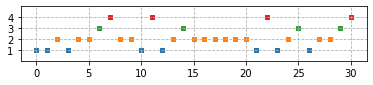

In [4]:
import matplotlib.pyplot as plt

plt.style.use('pysan/docs/notebooks/pysan.mplstyle')

sequence = [1,1,2,1,2,2,3,4,2,2,1,4,1,2,3,2,2,2,2,2,2,1,4,1,2,3,1,2,2,3,4]

details = ps.describe(sequence)
sequence_plot = ps.plot_sequence(sequence)
prevalences = ps.get_element_prevalence(sequence)
#sequence = ['A','A','B','A','A','C','C','C','A','B','A','A']

grams = ps.get_unique_ngrams(sequence, 2)

tm = ps.get_transition_matrix(sequence, alphabet=['A','B','C'])

print('element prevalences:', prevalences)
print('unique bigrams', grams)

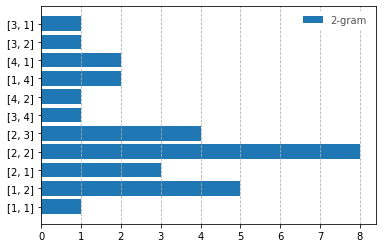

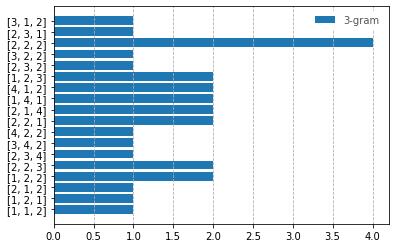

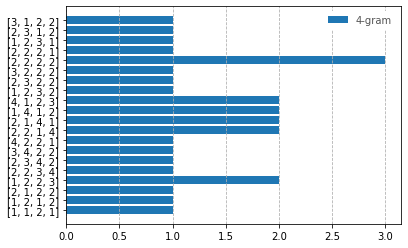

In [ ]:
def get_ngram_prevalence(sequence, n):
    """
    Computes the prevalence of ngrams in a sequence, returning a dictionary where each key is an ngram, and each value is the number of times that ngram appears in the sequence.
    
    """
    
    ngrams = ps.get_unique_ngrams(sequence, n)
    
    ngram_prevalence = {str(i):0 for i in ngrams}    
    
    for x in range(len(sequence) -  n):
        this_ngram = sequence[x:x + n]
        ngram_prevalence[str(this_ngram)] += 1
    
    return ngram_prevalence

get_ngram_prevalence(sequence, 3)


def plot_ngram_prevalence(sequence, n):
    
    ngram_prevalence = get_ngram_prevalence(sequence, n)
    
    xdata = [key for key,value in ngram_prevalence.items()]
    ydata = [value for key,value in ngram_prevalence.items()]
    
    plt.barh(xdata, ydata, label=str(n) +'-gram')
    plt.gca().yaxis.grid(False)
    plt.legend()
    plt.show()
    
plot_ngram_prevalence(sequence, 2)
plot_ngram_prevalence(sequence, 3)
plot_ngram_prevalence(sequence, 4)